In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency,pearsonr
import scipy.stats as st

# Path where csv file is located
data_path = "../csv_file/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
#Reading the csv file
data_churn = pd.read_csv(data_path)
#Reading csv file
data_churn.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,33.17822651
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


In [5]:
# Checking the number of customerid.
customerid_count=len(data_churn['customerID'].value_counts())
customerid_count

7043

In [6]:
#Counting unique values
unique_customerID = data_churn['customerID'].nunique()
unique_customerID

7043

In [7]:
#CHecking shape
data_churn.shape

(7043, 22)

In [8]:
#checking columns
data_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Unnamed: 21'],
      dtype='object')

In [9]:
#Getting information from dataframe
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#Counting cell in the total of columns
data_churn.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
Unnamed: 21         7043
dtype: int64

In [11]:
#Verifying cell in blank
blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')
print(blank_cells)

C:\Users\eek_e\AppData\Local\Temp\ipykernel_4052\3782148306.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_cells = data_churn.applymap(lambda x: pd.isna(x) or x == '')


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0            False          False            False          

In [12]:
#Since we got an error while converting to float. so we are just adding 0 to the empty cells and corverting the column to float
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')
data_churn['TotalCharges'] = data_churn['TotalCharges'].fillna(0)
data_churn['TotalCharges'] = data_churn['TotalCharges'].astype(float)
data_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#counting how many cells are == 0
count_totalcharges_0_values = (data_churn['TotalCharges'] == 0).sum()
count_totalcharges_0_values

11

In [14]:
#droping rows where TotalCharges==0
data_churn = data_churn[data_churn['TotalCharges'] != 0]
data_churn.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
Unnamed: 21         7032
dtype: int64

In [15]:
#dropping customerID since we don't need it. We are going to use the default index as unique key.
data_churn = data_churn.drop(columns=['customerID'])
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784


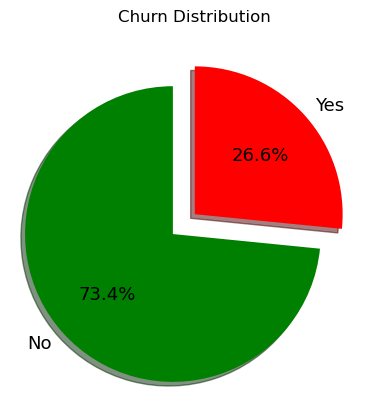

In [15]:
#PLoting Churn Distribution
test = data_churn['Churn'].value_counts()
label = ['No', 'Yes']
plt.pie(test,labels=label, autopct='%1.1f%%',colors=['green', 'red'],startangle=90,shadow=True, explode=(0.2, 0.0), 
        textprops={'fontsize': 13, 'color': 'black'})
plt.title('Churn Distribution')
plt.savefig("../Plot/ChurnDistribution.png")
plt.show()

In [16]:
#describing the data only 2 numerical columns
data_churn[['MonthlyCharges', 'tenure']].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.35,89.8625,118.75
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.00,55.0000,72.00


# Hypothesis 1: Monthly Charges and Churn 
o  Statement: Customers with higher monthly charges are more likely to churn.
o  Reasoning: Higher monthly charges might lead to customer dissatisfaction, prompting them to seek cheaper alternatives.

In [17]:
#What is the average monthly charge for churn vs non-churn customers
monthly_rate = data_churn.groupby('Churn')['MonthlyCharges'].mean()
monthly_rate

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [19]:
#Correlation between churn - Yes and monthly charges and the spread in a scatter plot 
# Calculate correlation coefficient #Check stpearson function as well for the correlation
churn= data_churn['Churn'].value_counts()
correlation = monthly_rate.corr(churn)
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: -1.00


In [22]:
# Monthly charges - Mean, Median and Standard dev using the aggregation method
monthlycharge_st = data_churn.groupby('Churn')['MonthlyCharges'].agg(mean='mean', median='median',var='var', std='std',
    sem=lambda x: st.sem(x, nan_policy='omit'))

# Assemble the resulting series into a single summary DataFrame.
monthlycharge_st = pd.DataFrame(monthlycharge_st)
monthlycharge_st

,mean,median,var,std,sem
Churn,,,,,
No,61.265124,64.425,966.752767,31.092648,0.432259
Yes,74.441332,79.650,608.414183,24.666053,0.570552


In [25]:
#Bin tenure Establish the bins
tenure_bins = [-1, 12, 24, 36, 48, 60, 72, 120]
labels = ["0-12m", "12-24m", "24-36m", "36-48m", "48-60m", "60-72m", ">72m" ]

tenure_df = data_churn
# Use `pd.cut` on the data churn dataframe to categorize tenure on the bins.
tenure_df["Tenure"] = pd.cut(data_churn["tenure"], tenure_bins, labels =labels)

# Convert Tenure to a string
tenure_df["Tenure"]  = tenure_df["Tenure"].astype(str)
tenure_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0-12m
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,33.17822651,24-36m
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2.008356546,0-12m
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43.51654846,36-48m
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2.144978784,0-12m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,23.47287736,12-24m
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,71.34593023,60-72m
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,11.70439189,0-12m
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,4.120967742,0-12m


# Hypothesis 2: Contract Type and Churn - G
o  Statement: Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts.
o  Reasoning: Month-to-month contracts provide more flexibility, allowing customers to switch providers more easily.

In [31]:
#dropping the column not relevant to the study: InternetService,DeviceProtection, PaperlessBilling
data_churn_h2 = data_churn.drop(columns=['InternetService', 'DeviceProtection','PaperlessBilling'])
data_churn_h2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1,0-12m
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.5,No,33.17822651,24-36m
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,2.008356546,0-12m
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,43.51654846,36-48m
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,2.144978784,0-12m


In [32]:
data_churn_h2=data_churn_h2.rename(columns={"Contract":"Contract Type"})
data_churn_h2['Contract Type'] = data_churn_h2['Contract Type'].replace({'Month-to-month': 'Monthly'})
data_churn_h2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract Type,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Monthly,Electronic check,29.85,29.85,No,1,0-12m
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.5,No,33.17822651,24-36m
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Monthly,Mailed check,53.85,108.15,Yes,2.008356546,0-12m
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,43.51654846,36-48m
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,No,No,No,Monthly,Electronic check,70.70,151.65,Yes,2.144978784,0-12m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,One year,Mailed check,84.80,1990.5,No,23.47287736,12-24m
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.9,No,71.34593023,60-72m
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,Monthly,Electronic check,29.60,346.45,No,11.70439189,0-12m
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,Monthly,Mailed check,74.40,306.6,Yes,4.120967742,0-12m


In [34]:
#counting the number of churn vs non churn customers by contract type
churn_counts=data_churn_h2.groupby('Contract Type')['Churn'].value_counts()
churn_counts

Contract Type  Churn
Monthly        No       2220
               Yes      1655
One year       No       1307
               Yes       166
Two year       No       1647
               Yes        48
Name: count, dtype: int64

In [35]:
#resetting the index to add Contract Type and Churn to the column
#creating a Data Frame 
churn_counts= churn_counts.reset_index()
churn_counts=pd.DataFrame (churn_counts)
churn_counts

,Contract Type,Churn,count
0,Monthly,No,2220
1,Monthly,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


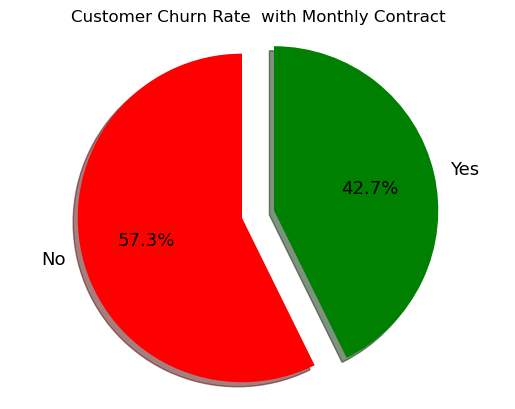

In [49]:
#creating the pie chart to show churn of customers with monthly contract
#Filter data for 'Monthly' contract type
#yes - churn customers, no - non-churn customers

Monthly = churn_counts[churn_counts['Contract Type'] == 'Monthly']
labels = Monthly['Churn']  
customers = Monthly['count']
colors = ['red', 'green']
explode = (0,0.2)  

plt.pie(customers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, 
        textprops={'fontsize': 13, 'color': 'black'})
plt.title("Customer Churn Rate  with Monthly Contract")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("../Plot/Customer Churn Rate  with Monthly Contract.png")
plt.show()

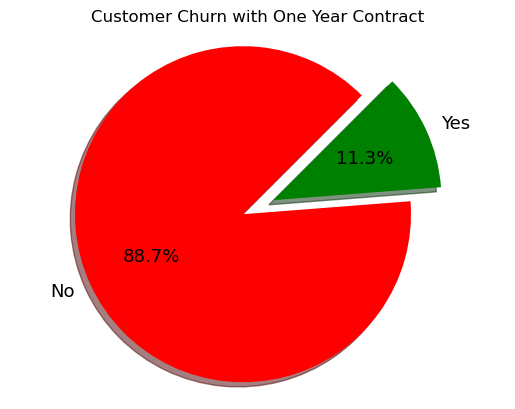

In [48]:
#create the pie chart to show churn of  customers with one year contract
#Filter data for 'One year' contract type
#yes - churn customers, no - non-churn customers

one_year = churn_counts[churn_counts['Contract Type'] == 'One year']
labels = one_year['Churn']  
customers = one_year['count']
colors = ['red', 'green']
explode = (0,0.2)   

plt.pie(customers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45,textprops={'fontsize': 13, 'color': 'black'})
plt.title("Customer Churn with One Year Contract")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("../Plot/Customer Churn Rate  with One Year Contract.png")
plt.show()

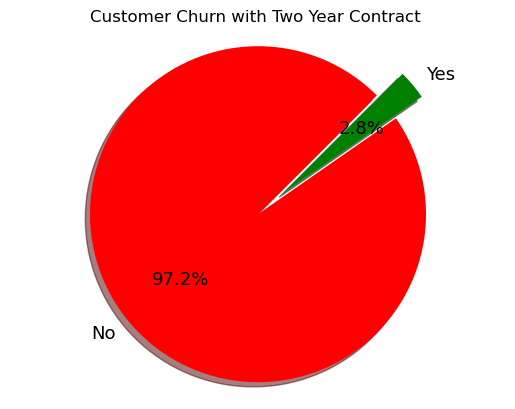

In [47]:
#creating the pie chart to show churn of  customers with two year contract
#Filter data for 'Monthly' contract type
#yes - churn customers, no - non-churn customers

two_year = churn_counts[churn_counts['Contract Type'] == 'Two year']
labels = two_year['Churn']  
customers = two_year['count']
colors = ['red', 'green']
explode = (0,0.2) 

plt.pie(customers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45,textprops={'fontsize': 13, 'color': 'black'})
plt.title("Customer Churn with Two Year Contract ")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("../Plot/Customer Churn Rate  with Two Year Contract.png")
plt.show()

In [39]:
#counting the  churn rate by Contract Type
#convert the decimal to percent
contract_type_churn_rate =data_churn_h2.groupby('Contract Type')['Churn'].value_counts(normalize=True).unstack()
contract_type_churn_rate['No'] = contract_type_churn_rate['No']*100
contract_type_churn_rate['Yes'] = contract_type_churn_rate['Yes']*100
contract_type_churn_rate

Churn,No,Yes
Contract Type,,
Monthly,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


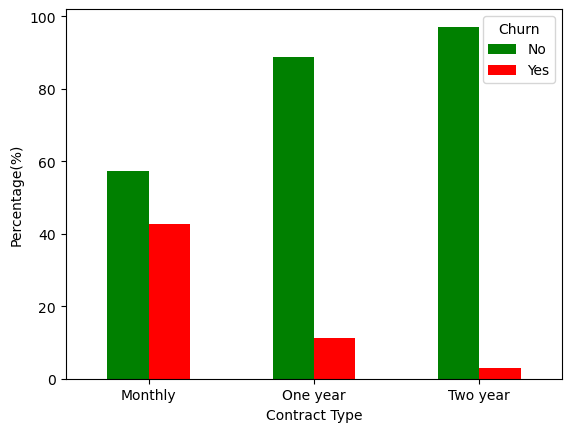

In [40]:
contract_type_churn_rate.plot(kind="bar", ylabel ='Percentage(%)', xlabel='Contract Type', color =['green', 'red'],rot=0)
plt.savefig("../Plot/Contract Type Churn Rate.png")

In [43]:
# Calculate Pearson correlation

# To calculate correlation, we need numerical values for Contract Type
# contract_type_churn_rate['Contract Type'] = contract_type_churn_rate['Contract Type'].map({'Monthly': 0, 'One year': 1, 'Two year': 2})
contract_type_churn_rate.index = contract_type_churn_rate.index.map({'Monthly': 0, 'One year': 1, 'Two year': 2})
# # Calculate Pearson correlation
contract_type_churn_rate = contract_type_churn_rate.reset_index()
correlation, p_value = pearsonr(contract_type_churn_rate.index, contract_type_churn_rate['Yes'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson correlation coefficient: -0.9487696762420961
P-value: 0.20465879953637273


# Hypothesis 3: Tenure and Churn - D
o  Statement: Customers with a shorter tenure are more likely to churn.
o  Reasoning: New customers may not have formed a strong attachment to the service yet and might be more open to trying other providers.

In [52]:
#What is the average tenure for churn vs non-churn customers
tenure_period = data_churn.groupby('Churn')['tenure'].mean()
tenure_period

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [53]:
# Tenure - Mean, Median and Standard dev using the aggregation method
tenure_st = data_churn.groupby('Churn')['tenure'].agg(mean='mean', median='median',var='var', std='std',
    sem=lambda x: st.sem(x, nan_policy='omit'))

# Assemble the resulting series into a single summary DataFrame.
tenure_st = pd.DataFrame(tenure_st)
tenure_st

,mean,median,var,std,sem
Churn,,,,,
No,37.569965,38.0,581.474226,24.113777,0.335237
Yes,17.979133,10.0,381.464768,19.531123,0.451775


In [26]:
#Group by Tenure bins
Tenure_bins_summary = pd.DataFrame(tenure_df.groupby('Tenure')['Churn'].value_counts().unstack())
Tenure_bins_summary

Churn,No,Yes
Tenure,,
0-12m,1149,1037
12-24m,730,294
24-36m,652,180
36-48m,617,145
48-60m,712,120
60-72m,1314,93


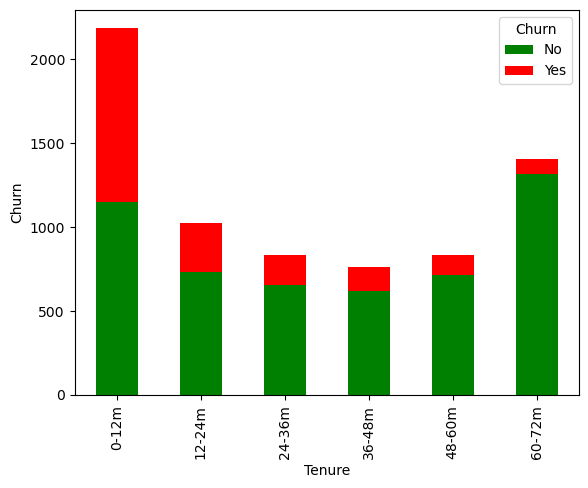

In [28]:
#Stack column chart to show 
# Set 'Category' as index for better plotting
# Create a bar plot using Pandas
Tenure_bins_summary.plot(kind='bar', stacked=True, figsize=(6.5, 5),color=['g', 'r'],rot=0)

# Customize the plot
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.xticks(rotation=90)  

# Display the plot
plt.savefig("../Plot/Tenure vs Churn.png")
plt.show()

In [29]:
#run correlation
#Correlation between churn - Yes and monthly charges and the spread in a scatter plot 
# Calculate correlation coefficient #Check stpearson function as well for the correlation
correlation = tenure_period.corr(churn)
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 1.00


# Hypothesis 4: Senior Citizens and Churn
o  Statement: Senior citizens are less likely to churn compared to younger customers.
o  Reasoning: Senior citizens might have more established routines and be less inclined to switch providers.

In [24]:
#Senior and Non-Senior Citizens Churn Table 
senior_churn_rate = data_churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() # taking this from https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
senior_churn_rate['No'] = senior_churn_rate['No']*100
senior_churn_rate['Yes'] = senior_churn_rate['Yes']*100
senior_churn_rate

Churn,No,Yes
SeniorCitizen,,
0,76.349745,23.650255
1,58.318739,41.681261


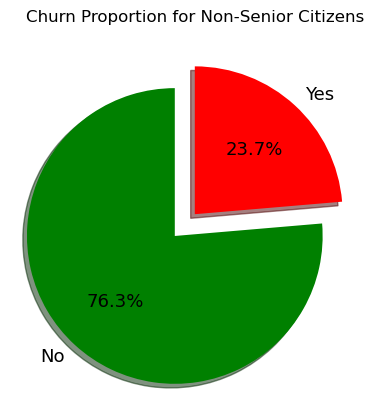

In [25]:
# Churn Proportion for Non-Senior Citizens Pie
label = ['No', 'Yes']
non_senior_churn = senior_churn_rate.loc[0] 
plt.pie(non_senior_churn, labels=label, autopct='%1.1f%%',colors=['green', 'red'],startangle=90,shadow=True, explode=(0.2, 0.0), 
        textprops={'fontsize': 13, 'color': 'black'})
plt.title('Churn Proportion for Non-Senior Citizens')
plt.savefig("../Plot/Churn Proportion for Non-Senior Citizens.png")
plt.show()


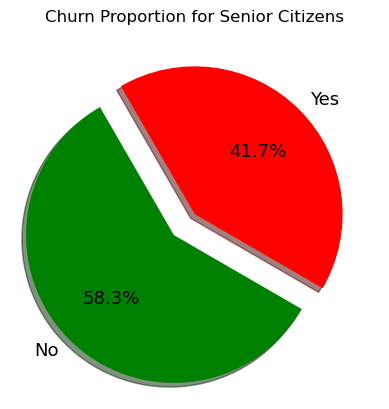

In [26]:
# Churn Proportion for Senior Citizens Pie
label = ['No', 'Yes']
senior_churn = senior_churn_rate.loc[1] 
plt.pie(senior_churn, labels=label, autopct='%1.1f%%',colors=['green', 'red'],startangle=120,shadow=True, explode=(0.2, 0.0), 
        textprops={'fontsize': 13, 'color': 'black'})
plt.title('Churn Proportion for Senior Citizens')
plt.savefig("../Plot/Churn Proportion for Senior Citizens.png")
plt.show()

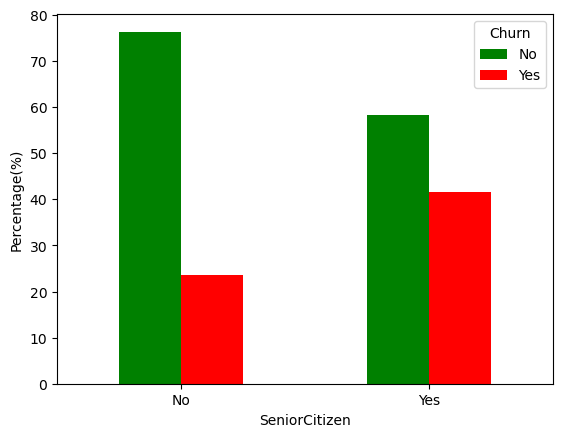

In [27]:
#Churn Proportion for Non-Senior and Senior Citizens Bar Chart
senior_churn_rate.index = senior_churn_rate.index.map({0: 'No', 1: 'Yes'})
senior_churn_rate.plot(kind="bar", ylabel='Percentage(%)', xlabel='SeniorCitizen', color=['green', 'red'],rot=0)
plt.savefig("../Plot/Churn Proportion Bar.png")

In [28]:
# Perform chi-square test
contingency_table = pd.crosstab(data_churn['SeniorCitizen'], data_churn['Churn'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("chi2_stat-value:", chi2_stat)
print("P-value:", p_value)
print("dof-value:", dof)

chi2_stat-value: 158.4408162893713
P-value: 2.4792557203954705e-36
dof-value: 1


# Hypothesis 5: Dependents and Churn
o  Statement: Customers with dependents or a partner are less likely to churn compared to those without dependents or a partner.
o  Reasoning: Families or households may have more entrenched usage and commitments to telecom services, leading to lower churn.

In [16]:
#dropping the column not relevant to the study: InternetService,DeviceProtection, PaperlessBilling
data_churn_h5 = data_churn
data_churn_h5 = data_churn_h5.drop(columns=['InternetService', 'DeviceProtection','PaperlessBilling'])
data_churn_h5.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No,33.17822651
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,2.008356546
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,43.51654846
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,2.144978784


In [18]:
#combining Partner and Dependents column into one and create a new column named "Family Plan"
data_churn_h5['Partner-Dependents'] = data_churn_h5.apply(lambda row: 'Yes' if row['Partner'] == 'Yes' or row['Dependents'] == 'Yes' else 'No', axis=1)
data_churn_h5

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Partner-Dependents
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,1,Yes
1,Male,0,No,No,34,Yes,No,Yes,No,No,No,No,One year,Mailed check,56.95,1889.50,No,33.17822651,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,2.008356546,No
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,43.51654846,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,2.144978784,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,One year,Mailed check,84.80,1990.50,No,23.47287736,Yes
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.90,No,71.34593023,Yes
7040,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,Month-to-month,Electronic check,29.60,346.45,No,11.70439189,Yes
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,Month-to-month,Mailed check,74.40,306.60,Yes,4.120967742,Yes


In [19]:
#counting the number of churn vs non churn customers by Family Plan
churn_counts = data_churn_h5.groupby('Partner-Dependents')['Churn'].value_counts()
churn_counts= churn_counts.reset_index()
churn_counts

,Partner-Dependents,Churn,count
0,No,No,2157
1,No,Yes,1123
2,Yes,No,3006
3,Yes,Yes,746


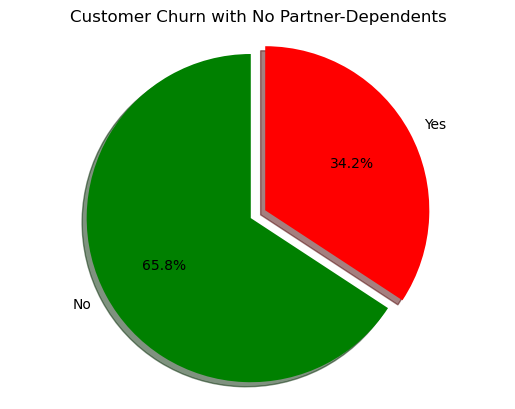

In [20]:
#creating the pie chart to show churn if Family Plan(FP) is no
#Filter data for Family Plan no
#yes - churn customers, no - non-churn customers

No_FP = churn_counts[churn_counts['Partner-Dependents'] == 'No']
churn_no = No_FP['Churn']
customers = No_FP['count']
colors = ['g', 'r']
explode = (0,0.1)  

plt.pie(customers, explode=explode, labels=churn_no, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Customer Churn with No Partner-Dependents")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("../Plot/Customer Churn with No Partner-Dependents.png")
plt.show()

# Hypothesis 6: Additional Services and Churn
o  Statement: Customers who subscribe to multiple additional services (e.g., streaming TV, device protection) are less likely to churn.
o  Reasoning: Customers using multiple services may find more value in their subscription and be less likely to leave.

In [21]:
# counting how many additional services the customers have and calculating churn rate for each group
additional_services = ['StreamingTV', 'StreamingMovies', 'DeviceProtection', 'TechSupport','OnlineBackup','OnlineSecurity']
data_churn['number_additional_services'] = data_churn[additional_services].apply(lambda x: x.eq('Yes').sum(), axis=1)
additional_services_churn_rate = data_churn.groupby('number_additional_services')['Churn'].value_counts(normalize=True).unstack().fillna(0)


Churn,No,Yes
number_additional_services,,
0,0.785359,0.214641
1,0.542443,0.457557
2,0.641820,0.358180
3,0.726052,0.273948
4,0.776471,0.223529
5,0.875220,0.124780
6,0.947183,0.052817


In [22]:
# Perform chi-square test for qualitative (categorical) Column
contingency_table_services = pd.crosstab(data_churn['number_additional_services'], data_churn['Churn'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_services)
print("chi2_stat-value:", chi2_stat)
print("P-value:", p_value)
print("dof-value:", dof)

chi2_stat-value: 389.04415274003037
P-value: 6.3315288479146875e-81
dof-value: 6


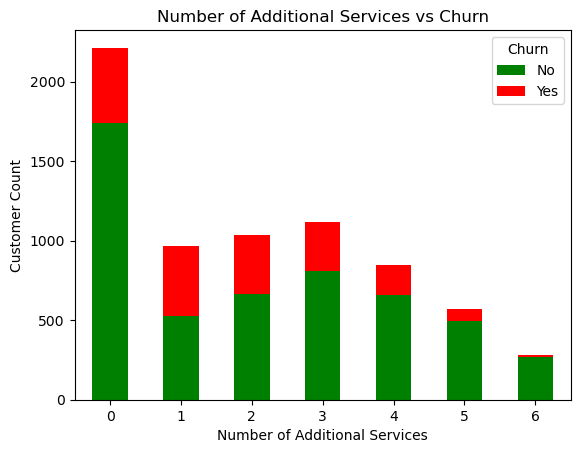

In [31]:
#Number of Additional Services vs Churn BarChart
services_churn_counts = data_churn.groupby('number_additional_services')['Churn'].value_counts().unstack()
services_churn_counts.plot(kind='bar', stacked=True,color=['green', 'red'],rot=0)
plt.title('Number of Additional Services vs Churn')
plt.xlabel('Number of Additional Services')
plt.ylabel('Customer Count')
plt.legend(title='Churn', loc='upper right')
plt.savefig("../Plot/Number of Additional Services vs Churn.png")
plt.show()

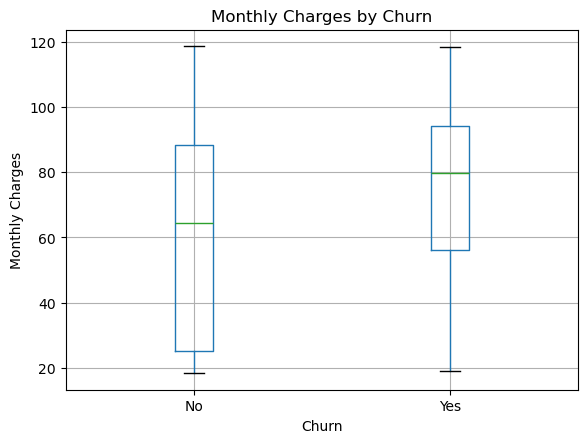

In [24]:
#Monthly Charges by Churn Box Plot
data_churn.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Monthly Charges by Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.savefig("../Plot/Monthly Charges by Churnboxplot.png")
plt.show()

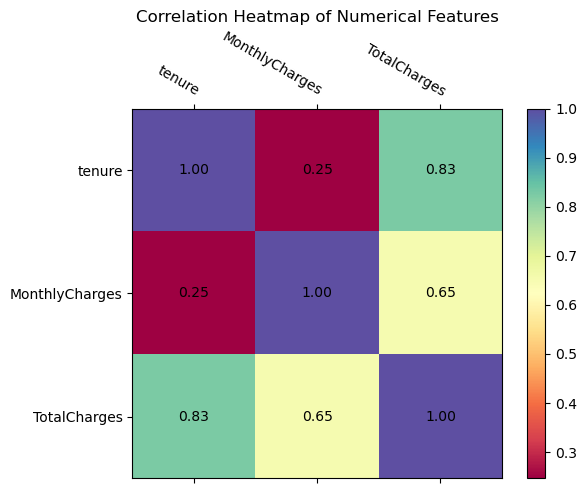

In [25]:
# Selecting numerical columns for the correlation matrix and Plotting the heatmap- Using this page as guide https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
fig, ax = plt.subplots()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = data_churn[numerical_columns].corr()
cax = ax.matshow(correlation_matrix, cmap='Spectral')
plt.colorbar(cax)
ax.set_xticks(np.arange(len(numerical_columns)))
ax.set_yticks(np.arange(len(numerical_columns)))
ax.set_xticklabels(numerical_columns,rotation=-30, ha="right", rotation_mode="anchor")
ax.set_yticklabels(numerical_columns)

for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title('Correlation Heatmap of Numerical Features')
plt.savefig("../Plot/Correlation Heatmap of Numerical Features.png")
plt.show()